# Simple Linear Regression

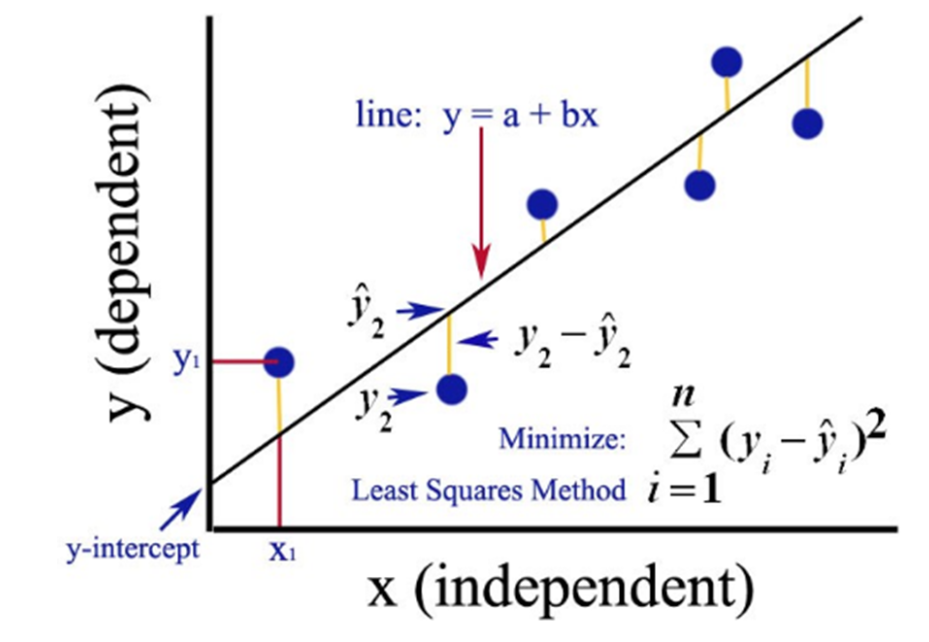

## 1. Create Dataframe - import dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the dataset

In [2]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Perform basic quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

0

## 2. Profit vs. RND

### Prfoti is target feature (which i am trying to predit based on RND budget of startup)

## 3. Visualize RND vs Profit

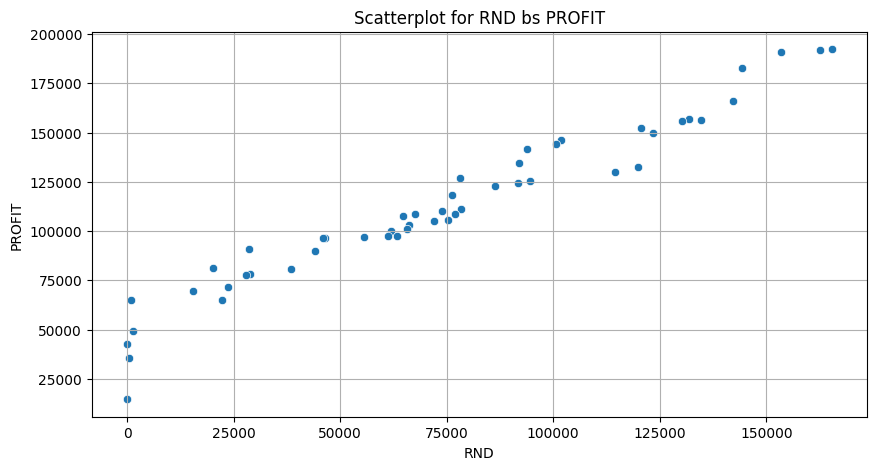

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='RND',y='PROFIT')
plt.title('Scatterplot for RND bs PROFIT')
plt.grid()
plt.show()

## 3. Separate X and Y terms

In [7]:
X = df[['RND']]
Y = df[['PROFIT']]

In [8]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [9]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## 4. Create a Linear Regression Model

### (i) Import Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

#### In a Jupyter environment please re-run this cell to show the HTML representation or trust the notebook

#### On Github, the HTML representation is unable to render, please try loading this page with nbviewer.org

In [11]:
B1 = model.coef_
B1

array([[0.85429137]])

In [12]:
B0 = model.intercept_
B0

array([49032.89914125])

### (ii) PROFIT_pred Equation --> B0 + B1*RND

### PRFOT_pred = 49032.90 + 0.8543*RND

### (iii) Evaluate the Model --> R2

In [13]:
r2 = model.score(X,Y)
r2

0.9465353160804393

#### As I am getting r2 score of 0.9465, the model is a good model as r2 > 0.8

### (iv) Visualize the fitter straight line

##### regplot --> R2 plot

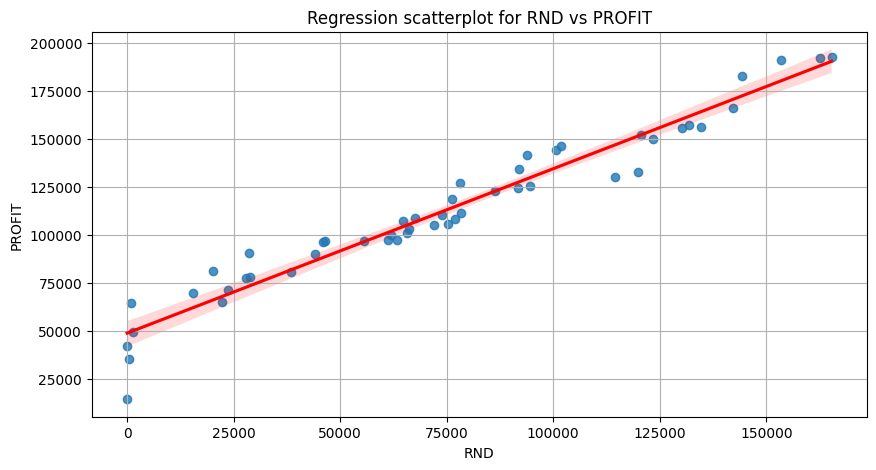

In [14]:
import matplotlib.pylab as plt
import seaborn as snsplt
plt.figure(figsize=(10,5))
sns.regplot(data=df,x='RND',y='PROFIT', line_kws={'color':'red'})
plt.title('Regression scatterplot for RND vs PROFIT')
plt.grid()
plt.show()

### (v) Estimate the predicted values by the model

In [15]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [17]:
Y.head()
# Compare the predicted values with the actual values

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### (vi) Estimate other metrics - MSE, RMSE, MAE, MAPE, R2

#### for this import thes from scikit learn package

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score

In [19]:
mse = mean_squared_error(Y, ypred)
mse

85120931.32706906

In [21]:
rmse = mse**(1/2)
rmse

9226.100548285232

In [23]:
mae = mean_absolute_error(Y, ypred)
mae

6910.98435457961

In [24]:
mape = mean_absolute_percentage_error(Y,ypred)
mape

0.11070141081984847

In [25]:
r2 = r2_score(Y, ypred)
r2

0.9465353160804393

##### Above model has good r2 score of 0.9365 which us more than 0.8

## 5. Predicting PRFOIT for a given RND value

In [26]:
rnd = [[150000]]
model.predict(rnd)

array([[177176.60478207]])

##### PROFIT_pred = 49032.90 + 0.8543*RND

In [27]:
49032.90 + 0.8543*150000

177177.9

##### Predictinf mutiple values

In [28]:
rnds = [[50000], [120000], [150000], [200000], [230000]]
profit = model.predict(rnds)
profit

array([[ 91747.46768819],
       [151547.86365391],
       [177176.60478207],
       [219891.17332901],
       [245519.91445718]])

## 6. Conclusion

##### a. RND increases by 1000, PROFIT increases by 854.3
##### b. RND and PRFOIT have strog linear relationship because of good r2 score of 0.9465

## 7. Pushing this file to Github

##### (i) ALWAYS save the file before pushing it to GitHub
###### File --> Save All
##### Everytime you make changes to this file ALWAYS save before pushing to GitHub

##### (ii) TERMINAL is used to push the files - Below 3 commands needs to be run

###### After saving the file, EVERYTIME use the below 3 commands to push it to GitHub

##### git add .
##### git commit -m "Class 08 - 27.01 - Simple Linear Regression Practical"
##### git push -u origin main
